<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter2ForwardModels/FourierAnalysisOfSound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourier analysis of an audio clip
## David Brady
## University of Arizona
## June 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Install librosa if not already installed
!pip install librosa

import librosa

In [2]:
# prompt: import the audio file whistle.mp3 as a numpy array



# Load the audio file
audio_data, sample_rate = librosa.load('whistle.mp3')

# Convert to numpy array
audio_array = np.array(audio_data)


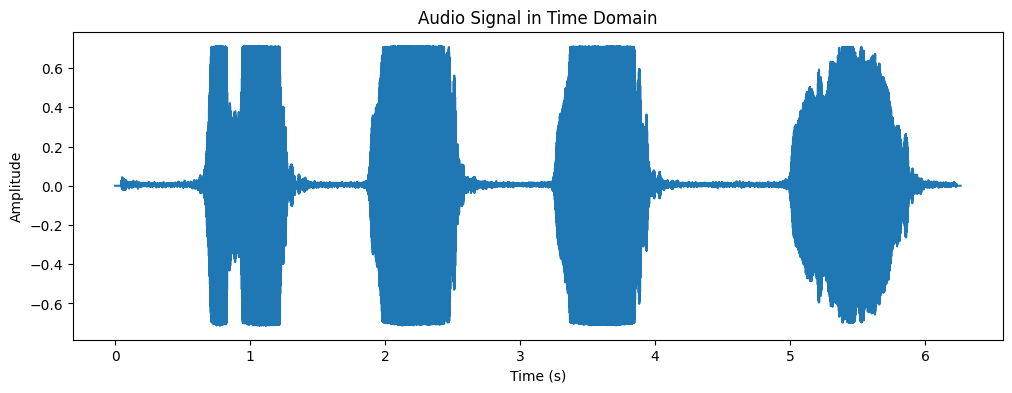

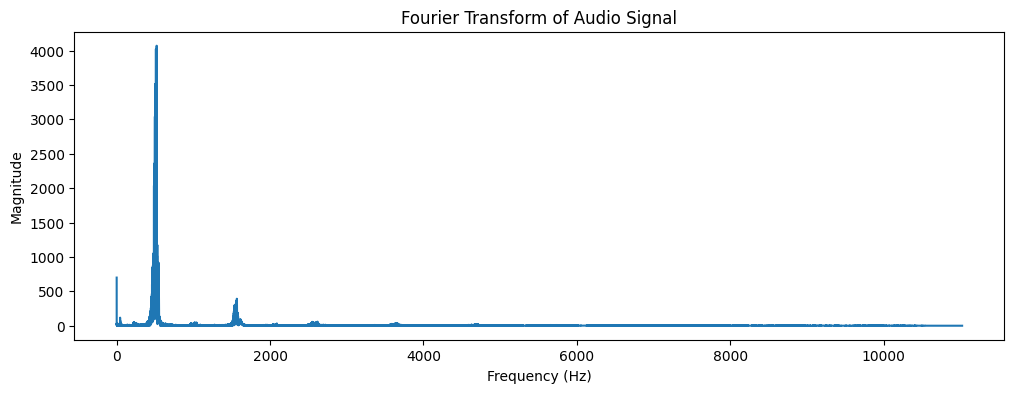

In [3]:
# prompt: plot audio_data in units of seconds and the fourier transform of audio_data in units of hertz



# Time domain plot
time = np.arange(0, len(audio_data)) / sample_rate
plt.figure(figsize=(12, 4))
plt.plot(time, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Signal in Time Domain')

# Fourier transform
fft_data = np.fft.fft(audio_data)
frequencies = np.fft.fftfreq(len(fft_data), 1/sample_rate)

# Frequency domain plot
plt.figure(figsize=(12, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_data[:len(fft_data)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Audio Signal')

plt.show()


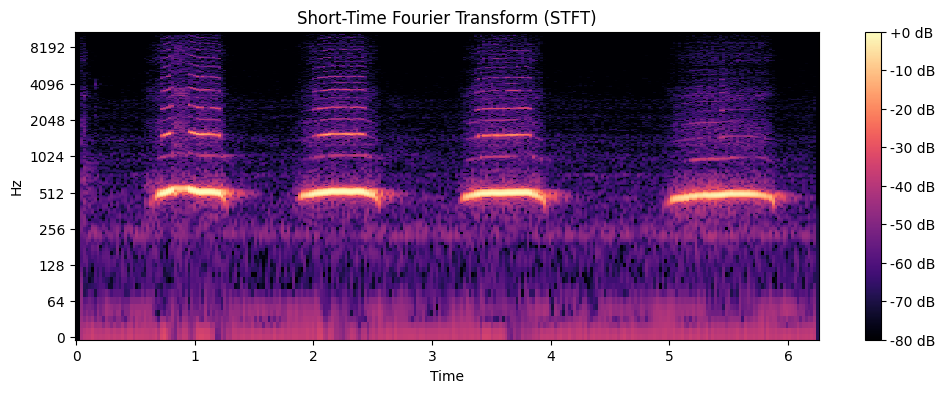

In [4]:
# prompt: plot the short time fourier transform of audio_data

# Calculate short-time Fourier transform
stft_data = librosa.stft(audio_data, n_fft=2048, hop_length=512, win_length=1024)

# Magnitude spectrogram
magnitude_spectrogram = np.abs(stft_data)

# Plot the spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(magnitude_spectrogram, ref=np.max),
                         y_axis='log', x_axis='time', sr=sample_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Short-Time Fourier Transform (STFT)')
plt.show()


In [5]:
audio_data.shape

(138122,)

In [6]:
sample_rate

22050

Text(0.5, 1.0, 'Audio Signal in Time Domain')

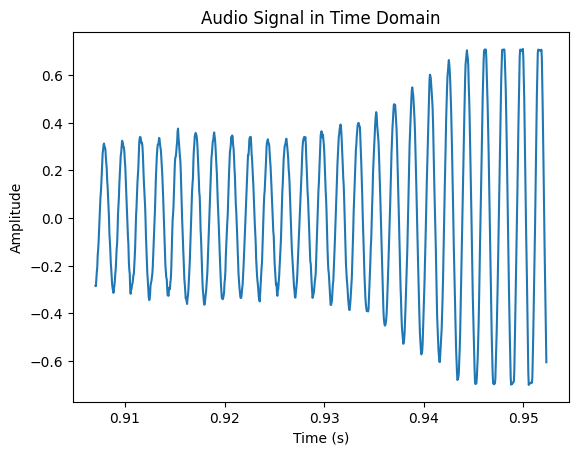

In [9]:
plt.plot(time[20000:21000], audio_data[20000:21000])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Signal in Time Domain')


Text(0.5, 1.0, 'Fourier Transform of Audio Signal')

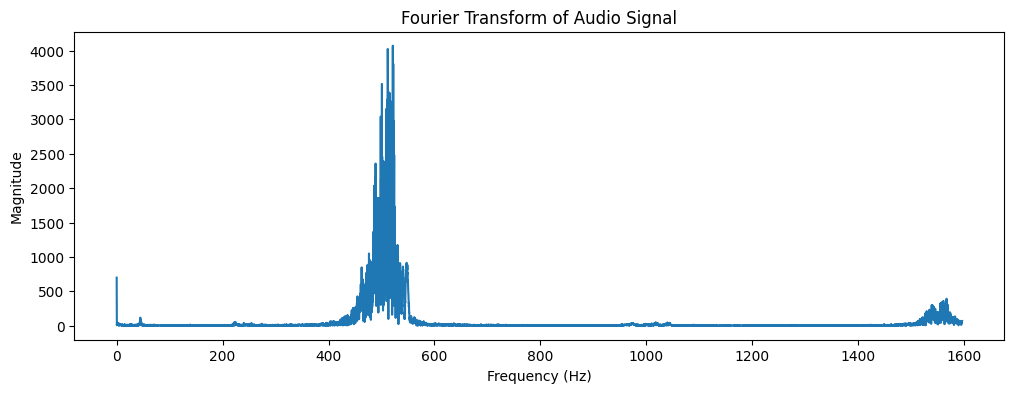

In [11]:
# Frequency domain plot
plt.figure(figsize=(12, 4))
plt.plot(frequencies[:10000], np.abs(fft_data[:10000]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Audio Signal')